In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ss; ss.set()

from dist_utils import readData, plotDist, polish, pTotal

Control, LAP25, Lap50, GEM5, GEM10, TAX2, TAX3 = readData(r'CCDurations.xlsx')

In [2]:
control = polish(Control)
lap50 = polish(Lap50)

In [3]:

g1lap50 = sp.gamma.rvs(a=5, loc=0, scale=6.17, size=5000)
lnspclap50 = np.linspace(1, 80, len(lap50[0]))
ag,bg,cg = sp.gamma.fit(g1lap50)  
pdf_gammag1lap = sp.gamma.pdf(lnspclap50, ag, bg,cg)
g1cont = sp.gamma.rvs(a=5, loc=0, scale=3.6, size=5000)
lnspccont = np.linspace(1, 80, len(control[0]))
agc,bgc,cgc = sp.gamma.fit(g1cont)  
pdf_gammag1cont = sp.gamma.pdf(lnspccont, agc, bgc,cgc) 

g2lap50 = sp.gamma.rvs(a=19, loc=0, scale=1.32, size=5000)
lnspclap502 = np.linspace(1, 80, len(lap50[1]))
ag0,bg0,cg0 = sp.gamma.fit(g2lap50)  
pdf_gammag1lap2 = sp.gamma.pdf(lnspclap502, ag0, bg0,cg0)
g2cont = sp.gamma.rvs(a=19, loc=0, scale=1.18, size=5000)
lnspccont2 = np.linspace(1, 80, len(control[1]))
agc2,bgc2,cgc2 = sp.gamma.fit(g2cont)  
pdf_gammag1cont2 = sp.gamma.pdf(lnspccont2, agc2, bgc2,cgc2) 


Text(45,0.06,' shape: 19 \n control scale: 1.1 \n lap.50 scale: 1.3')

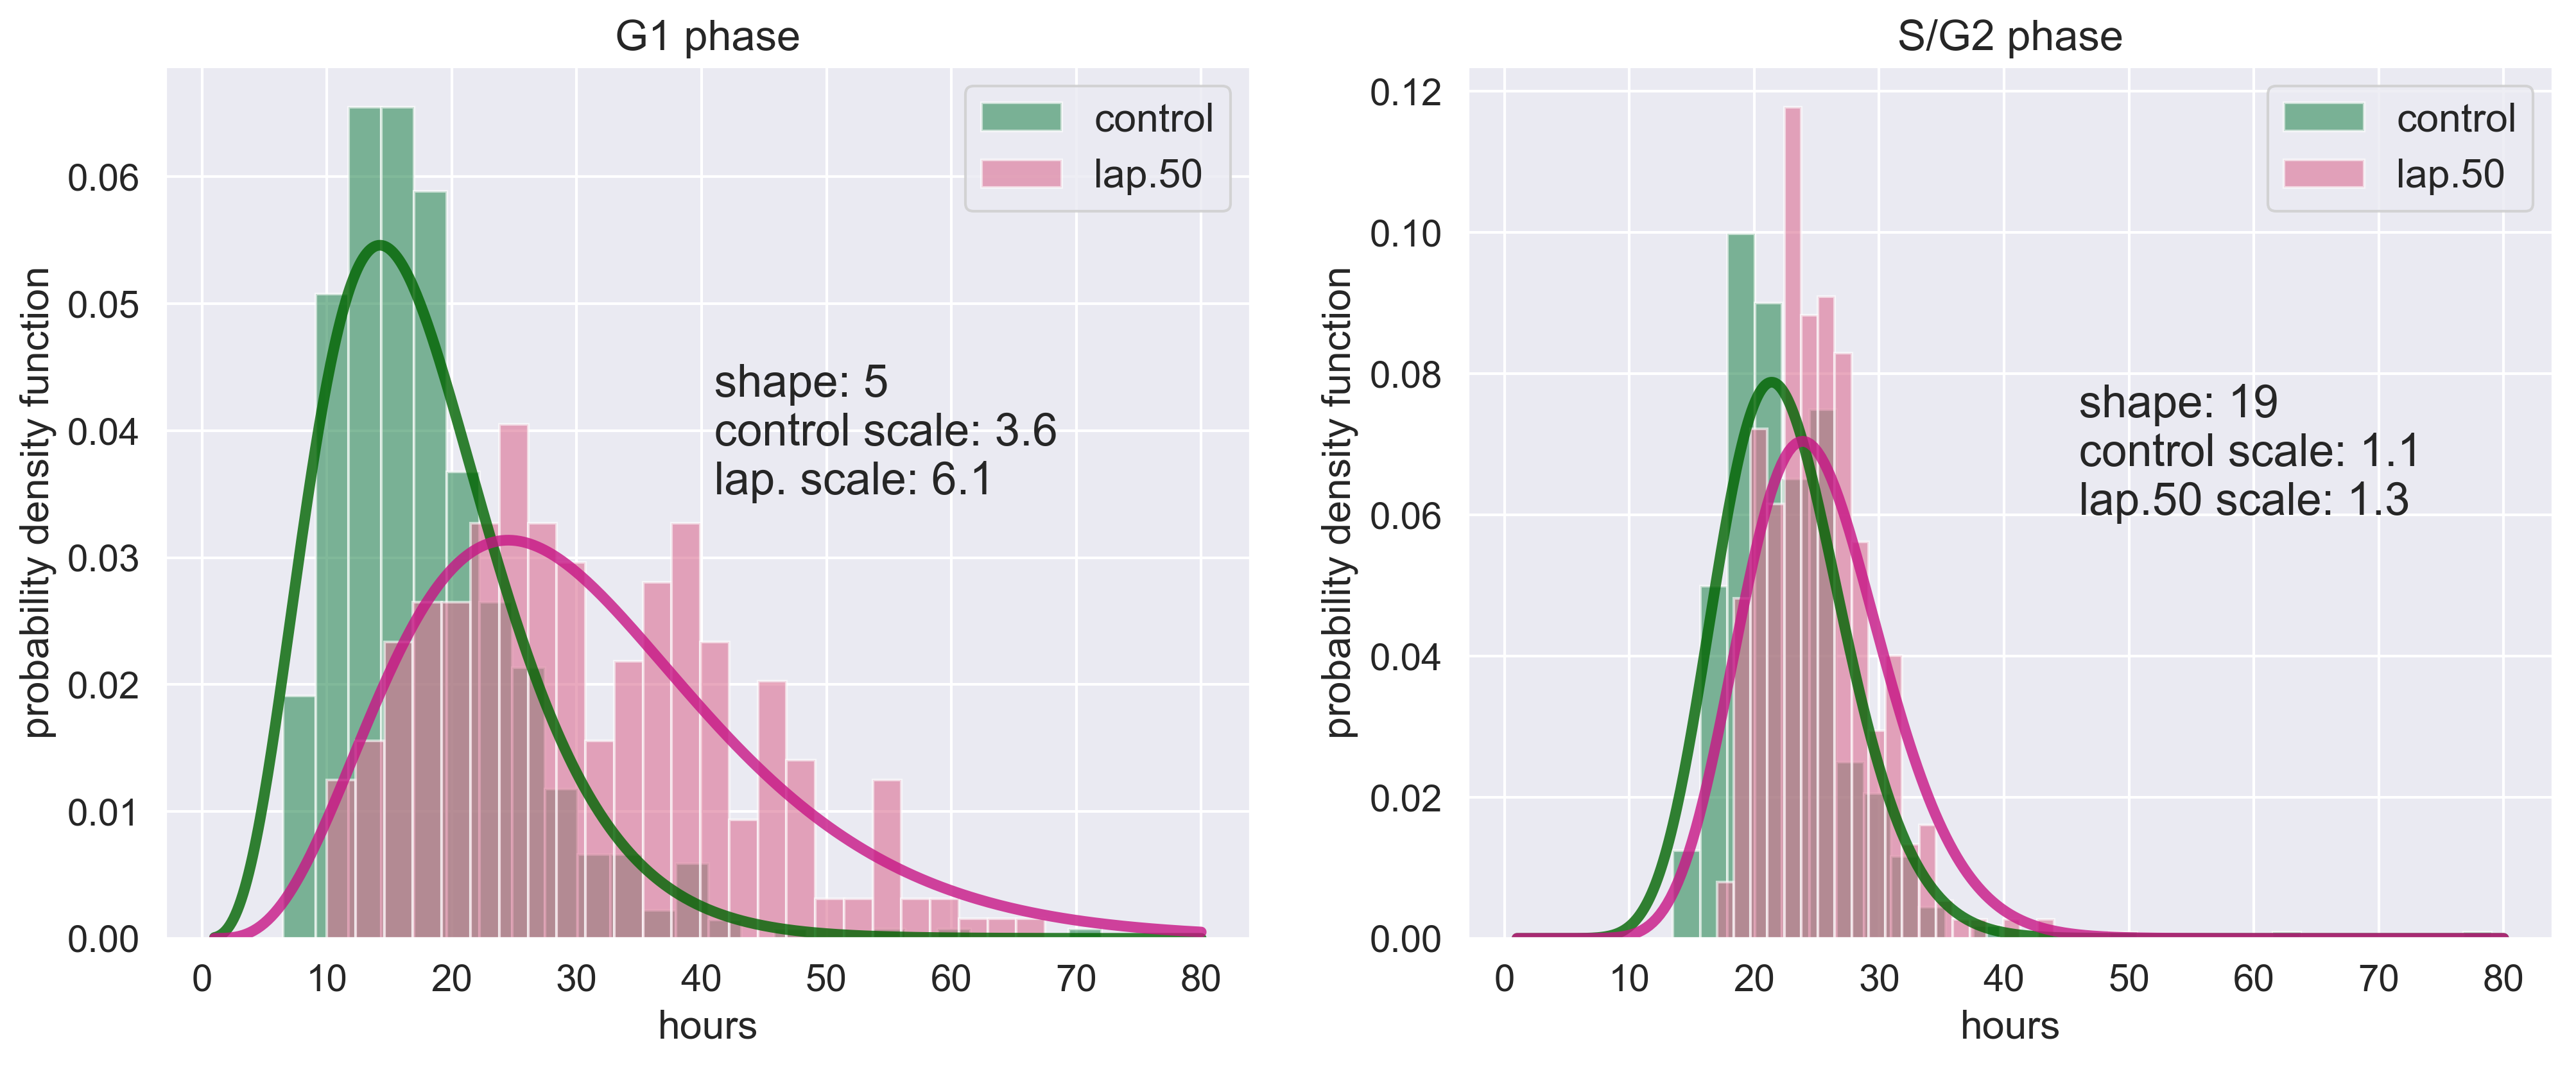

In [4]:
plt.figure(figsize = (16, 6), dpi = 300)
plt.subplot(1,2,1)
plt.hist(control[0], bins=25, density=True, color='seagreen', alpha=0.6, label='control')
plt.xlabel('hours', fontsize=15)
plt.ylabel('probability density function', fontsize=15)
plt.plot(lnspccont, pdf_gammag1cont, color="darkgreen", lw=4, alpha=0.8)

plt.hist(lap50[0], bins=25, density=True, color = 'palevioletred', alpha=0.6, label='lap.50')
plt.plot(lnspclap50, pdf_gammag1lap, color = 'mediumvioletred', lw=4, alpha=0.8)
plt.title("G1 phase", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.text(40, 0.035, ' shape: 5 \n control scale: 3.6 \n lap. scale: 6.1', fontsize=17)

###
plt.subplot(1,2,2)
plt.hist(control[1], bins=30, density=True, color='seagreen', alpha=0.6, label='control')
plt.xlabel('hours', fontsize=15)
plt.ylabel('probability density function', fontsize=15)
plt.plot(lnspccont2, pdf_gammag1cont2, color="darkgreen", lw=4, alpha=0.8)

plt.hist(lap50[1], bins=20, density=True, color = 'palevioletred', alpha=0.6, label='lap.50')
plt.plot(lnspclap502, pdf_gammag1lap2, color = 'mediumvioletred', lw=4, alpha=0.8)
plt.title("S/G2 phase", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.text(45, 0.06, ' shape: 19 \n control scale: 1.1 \n lap.50 scale: 1.3', fontsize=17)

### Generating the cell population based on the parameters and visualizing the number of cells in G1, G2, and in total.

In [ ]:


# initCells = 40
# experimentTime = 90
# locBern1 = 0.75
# locBern2 = 0.75

# # creating the lineage (control)
# lin_control = generateLineageWithTime(initCells, experimentTime, locBern1, g1_a, g1_b, g2_a, g2_b)

# # creating the lineage (lopatinib)
# lin_lapatinib = generateLineageWithTime(initCells, experimentTime, locBern2, g1_a_lap, g1_b_lap, g2_a_lap, g2_b_lap)

# # set the number of lineages as the number of intial cells we start with
# num_of_lins = initCells

# # separating the population in terms of their root parent
# pop_control = separate_pop(num_of_lins, lin_control)
# pop_lapatinib = separate_pop(num_of_lins, lin_lapatinib)

# time = np.linspace(18, 90, 80)

# # Determining the number of cells in G1 or G2 phase for every time point
# num_g1, num_g2, num_cell = inG1_or_G2(lin_control, time)   
# num_g1_lap, num_g2_lap, num_cell_lap = inG1_or_G2(lin_lapatinib, time) 

# # Plotting the # of cells in G1, G2, and totall # of cells
# plt.figure(figsize = (18,8), dpi = 150)
# plt.subplot(2,2,1)
# plt.scatter(time, num_g1, label = 'g1')
# plt.scatter(time, num_g2, label = 'g2')
# plt.ylabel('# of cells in G1 and G2')
# plt.xlabel('time [hours]')
# plt.legend()
# plt.subplot(2,2,2)
# plt.scatter(time, num_g1_lap, label = 'g1 lap')
# plt.scatter(time, num_g2_lap, label = 'g2 lap')
# plt.ylabel('# of cells in G1 and G2 lap')
# plt.xlabel('time [hours]')
# plt.legend()
# plt.subplot(2,2,3)
# plt.scatter(time, num_cell, label = 'est total')
# plt.ylabel('total # of cells')
# plt.xlabel('time [hours]')
# plt.legend()
# plt.subplot(2,2,4)
# plt.scatter(time, num_cell_lap, label = 'est total lap')
# plt.ylabel('total # of cells')
# plt.xlabel('time [hours]')
# plt.legend()
# # plt.savefig('g1g2.png')
# plt.show()

# plt.figure(figsize = (18,4), dpi = 150)
# plt.subplot(1,2,1)
# # plt.scatter(time, num_g1, label = 'g1')
# plt.scatter(time, num_g2, label = 'g2 control')
# # plt.scatter(time, num_g1_lop, label = 'g1 lapatinib')
# plt.scatter(time, num_g2_lap, label = 'g2 lapatinib')
# plt.ylabel('# of cells in G2')
# plt.xlabel('time [hours]')
# plt.legend()
# plt.subplot(1,2,2)
# plt.scatter(time, num_cell, label = 'total control')
# plt.scatter(time, num_cell_lap, label = 'total lapatinib')
# plt.ylabel('total # of cells')
# plt.xlabel('time [hours]')
# plt.legend()
# # plt.savefig('1.png')
# plt.show()
